# پروژه چهارم - یادگیری ماشین
## نازنین یوسفیان
### 810197610

## هدف
### در این پروژه قصد داریم که الگوریتم های مختلف regression را بررسی کنیم. ابتدا مجموعه ای از داده ها را خوانده و اطلاعات مربوطه را ذخیره می کنیم. سپس با تحلیل درست داده ها، آن را به مجموعه ای معتبر تبدیل می کنیم و به این منظور پردازش های متفاوتی روی آن ها انجام می دهیم. سپس الگوریتم های متفاوت را تست کرده و دقت هر کدام را اندازه می گیریم تا به راه حل مناسبی برای حل مسئله برسیم.

## مقدمه
### مجموعه داده ای داریم که قیمت خانه را بر اساس تعدادی ویژگی تعیین می کند. با بررسی فایل *train.csv* یادگیری صورت می گیرد. پس از انجام پیش پردازش روی داده ها و شناخت آن ها، از کتابخانه SciKit-Learn برای اجرای الگوریتم های متفاوت استفاده می کنیم.

## توضیح پروژه

### فاز صفر
در این فاز ابتدا به بررسی داده هایی که داریم می پردازیم. EDA فرآیند مهمی است که ابتدا داده را بررسی می کنیم تا الگوهایی بین آن ها بیابیم، داده های غیرمتعارف را پیدا کنیم و فرضیه های متفاوت را روی آن ها تست کنیم که این کار با استفاده از مقادیری مانند میانگین، انحراف معیار و ... و نمودار ها انجام می پذیرد. بهتر است که قبل از شروع کار با داده ها ابتدا آن را به خوبی بشناسیم. 

In [1452]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

train = pd.read_csv('train.csv')



با استفاده از تابع *()describe* می توانیم اطلاعات متنوعی را راجع به ستون های عددی دیتافریم به دست آوریم. متوجه می شویم که 38 ستون عددی داریم. مقدار *count* تعداد داده ای که در هر ستون وجود دارد را مشخص می کند که توسط آن می توان تعداد سلول های خالی در هر ستون را متوجه شد. مقادیر بعدی به ترتیب میانگین، انحراف معیار، کمترین مقدار موجود در ستون، چارک اول، دوم و سوم و بیشترین مقدار موجود در ستون را نشان می دهد.
در ستون هایی که انحراف معیار زیادی دارند مانند *LotArea* مشاهده می شود که بین چارک سوم و ماکزیمم اختلاف زیادی وجود دارد که به این معناست که داده هایی داریم که اختلاف زیادی با بقیه دارند. به طور مثال این موضوع برای ستون های *BsmtFinSF1* و *BsmtUnfSF* نیز صادق است. 

In [1453]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


تابع *info* اطلاعاتی راجع به کل ستون ها در اختیار ما قرار می دهد. نوع داده های هر ستون و تعداد ردیف هایی که در هر ستون مقدار دارند و خالی نیستند را نشان می دهد. در کل 81 ستون داریم و 43 تا از آن ها مقدار عددی ندارند. 

In [1454]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

درصد داده های گمشده در هر ستون را به صورت زیر به دست می آوریم. متوجه می شویم که ویژگی هایی مانند *Alley* ، *PoolQc* و *MiscFeature* بیشترین درصد داده های گمشده را دارند.

In [1455]:
train.isnull().sum() / len(train)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

سپس وابستگی داده ها به یکدیگر را به دست آورده و آن را در نمودار Heatmap نمایش می دهیم.

In [1456]:
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<AxesSubplot:>

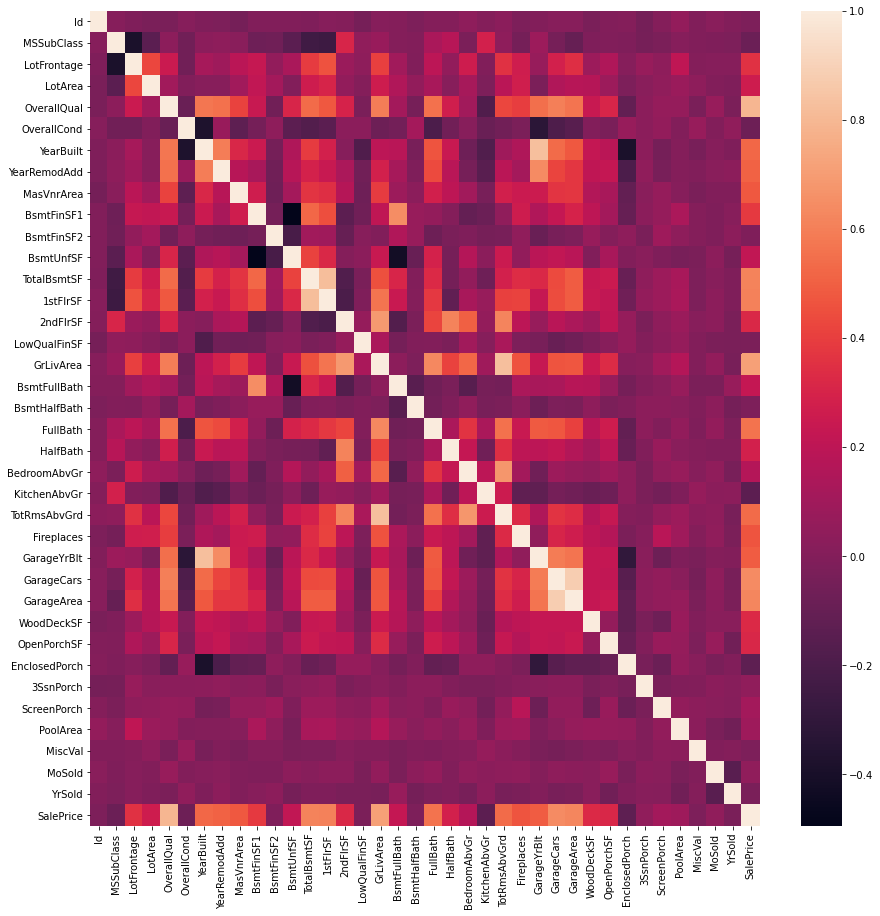

In [1457]:
plt.figure(figsize = (15, 15))
sns.heatmap(train.corr())


با توجه به مقادیر عددی که از *corr* به دست آوردیم و در نمودار heatmap نیز قابل مشاهده است، قیمت خانه به ترتیب به GarageCars، GrlivArea، OverallQual و GaragaArea وابستگی بیشتری دارد.
OverallQual رتبه ای است که خانه بر اساس مصالحی که در ساخت آن به کار رفته است و سالی که ساخت تمام شده گرفته است.
GrlivArea فاصله از سطح زمین را مشخص می کند
GarageCars و GarageArea به ترتیب میزان گنجایش گاراژ در واحد تعداد ماشین و در واحد سطح بیان می کند و همانطور که در نمودار نیز مشخص است، این دو وابستگی زیادی به یکدیگر دارند.

تبدیل لگاریتمی روشی است که یک متغیری را که نمودار منحنی دارد به متغیری تبدیل می کند که نمودار آن به توزیع نرمال نزدیک تر است. این عمل می تواند باعث شود که رابطه بین دو متغیر که خطی نیست، خطی شود. هم چنین باعث می شود  که تاثیر داده هایی که مقادیر خیلی متفاوتی با اکثر داده ها دارند کم شود و به مدل بهتری برسیم.


<AxesSubplot:>

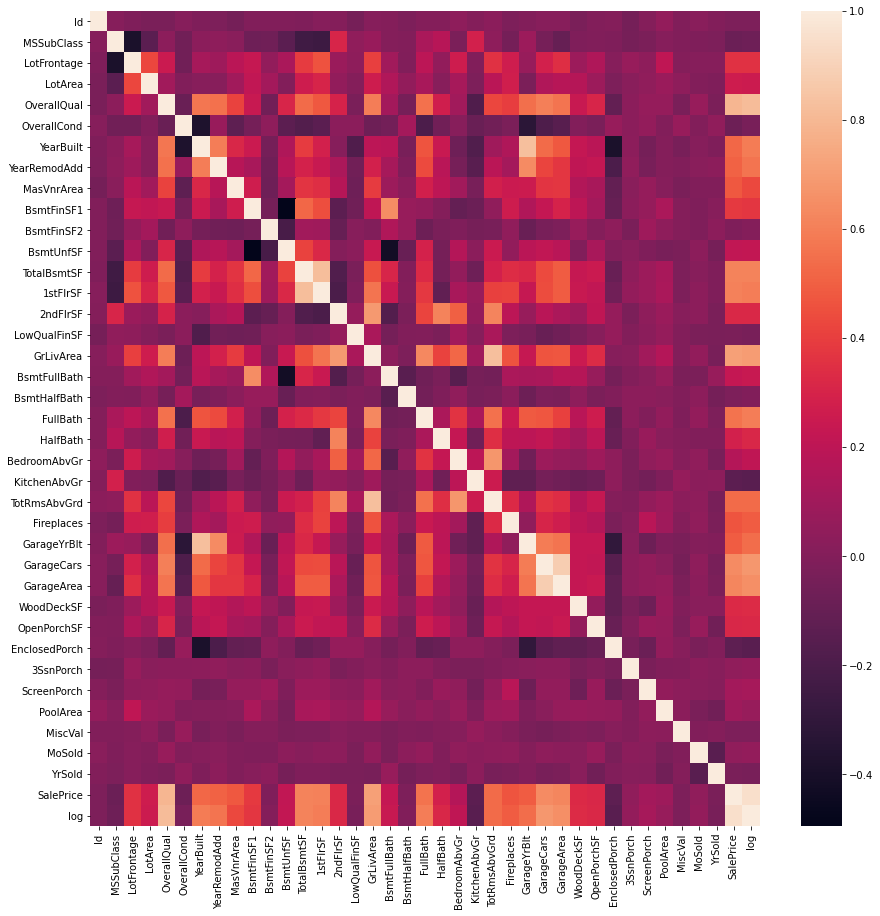

In [1458]:
def log(x):
    return math.log(x)
train['log'] = train['SalePrice'].apply(log)
plt.figure(figsize = (15, 15))
sns.heatmap(train.corr())

In [1459]:
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,log
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,-0.017942
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.073959
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799,0.355878
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,0.257320
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,0.817184
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,-0.036868
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,0.586570
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,0.565608
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493,0.430809
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,0.372023


Text(0.5, 0, 'log(Price)')

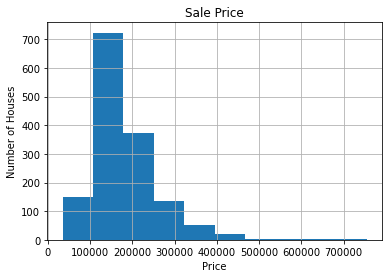

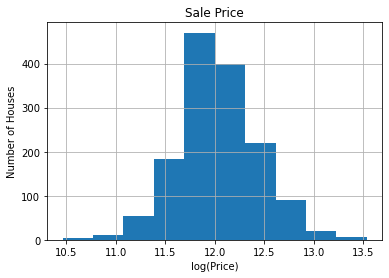

In [1460]:
train.hist(column = 'SalePrice')
plt.title('Sale Price')
plt.ylabel('Number of Houses')
plt.xlabel("Price")
train.hist(column = 'log')
plt.title('Sale Price')
plt.ylabel('Number of Houses')
plt.xlabel("log(Price)")

در اینجا از روش Pearson برای پیدا کردن وابستگی داده ها استفاده می کنیم که تعداد وابستگی های خطی بین دو بردار را محسابه می کند به این صورت که خط راستی را در نمودار پراکندگی می کشد و شیب آن را محاسبه می کند. در نتیجه این مقدار با لگاریتم گرفتن تغییر می کند. 

با استفاده از تابع *corr* تنها می توانیم وابستگی بین داده های عددی را ببینیم و نمی توانیم اطلاعاتی راجع به داده های غیر عددی، وابستگی شان به یکدیگر و وابستگی آن ها به قیمت خانه یا دیگر ویژگی های عددی را به دست آوریم.

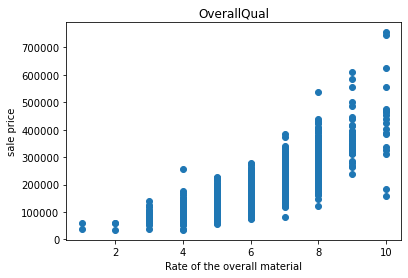

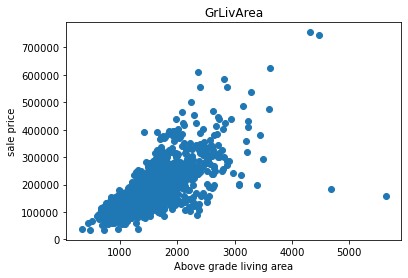

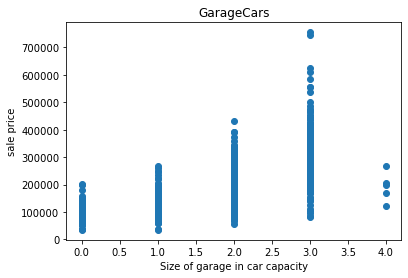

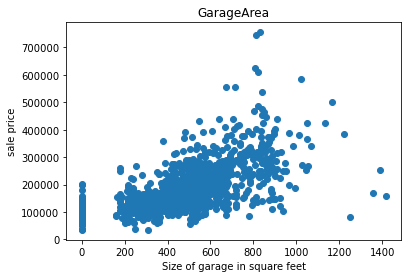

In [1461]:
plt.scatter(train['OverallQual'], train['SalePrice'])
plt.title('OverallQual')
plt.xlabel('Rate of the overall material')
plt.ylabel('sale price')
plt.show()

plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.title('GrLivArea')
plt.xlabel('Above grade living area')
plt.ylabel('sale price')
plt.show()

plt.scatter(train['GarageCars'], train['SalePrice'])
plt.title('GarageCars')
plt.xlabel('Size of garage in car capacity')
plt.ylabel('sale price')
plt.show()

plt.scatter(train['GarageArea'], train['SalePrice'])
plt.title('GarageArea')
plt.xlabel('Size of garage in square feet')
plt.ylabel('sale price')
plt.show()

با استفاده از *scatter* می توانیم وابستگی دو داده به یکدیگر را بهتر مشاهده کنیم. در این نمودار ها هر داده به صورت یک نقطه در نمودار در می آید که x آن مقدار ویژگی و y آن قیمت خانه است. به این صورت می توان پراکندگی داده را دید و فهمید که به ازای هر مقدار ویژگی چه قیمت خانه ای محتمل تر است. هم چنین داده هایی که تفاوت زیادی دارند و احتمالا حذف آن ها به بهتر شدن مدل ما کمک می کنند نیز مشخص می شوند. ممکن است در قسمت هایی از نمودار تراکم نقطه ها زیاد باشد و نتوانیم تشخیص دهیم که تعداد نقاطی که در آن ناحیه هستند چقدر است و آن را با نواحی دیگر دیگر مقایسه کنیم. در اینجا از *hexbin* استفاده می کنیم.


ویژگی *OverallQual* و *GarageCars* چون مقادیر گسسته ای می توانند بگیرند نمودار آن ها به صورت چند خط عمودی است. با استفاده از *hexbin* می توان فهمید که در کجا تراکم بیشتر است. به طور مثال برای ویژگی *OveallQual* می توان به این نتیجه رسید که اگر مقدار این ویژگی 5 باشد، محتمل تر است که قیمت خانه بین 100000 تا 150000 باشد. تعداد خانه هایی که مقدار این ویژگی برایشان 1 یا 2 باشد کم است. هم چنین اگر مقدار آن 8 باشد، خانه هایی که قیمت بیشتر از 500000 داشته باشند داده های خارج از محدوده هستند.
برای ویژگی *GarageCars* نیز مشاهده می شود که تعداد داده بیشتری این ویژگی برایشان 1 یا 2 است و در این حالت قیمت خانه حدود 100000 تا 200000 خواهد بود.

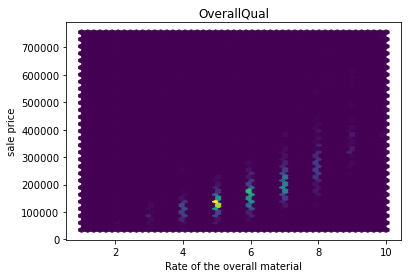

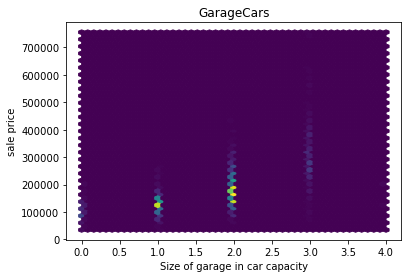

In [1462]:
plt.hexbin(train['OverallQual'], train['SalePrice'], gridsize = 50) 
plt.title('OverallQual')
plt.xlabel('Rate of the overall material')
plt.ylabel('sale price')
plt.show() 


plt.hexbin(train['GarageCars'], train['SalePrice'], gridsize = 50)
plt.title('GarageCars')
plt.xlabel('Size of garage in car capacity')
plt.ylabel('sale price')
plt.show()

برای ویژگی *GrLivArea* می بینیم که تا 3000 رابطه ان با قیمت خانه تقریبا خطی است و با افزایش ارتفاع، قیمت خانه نیز افزایش می یابد ولی پس از آن داده ها پراکنده است و نتیجه خاصی نمی توان گرفت. برای *GarageArea* نیز به طور مثال این نتیجه را گرفت که قیمت خانه ای که مساحت گاراژ آن 8000 square feet  است بیش از 400000 نخواهد بود. 

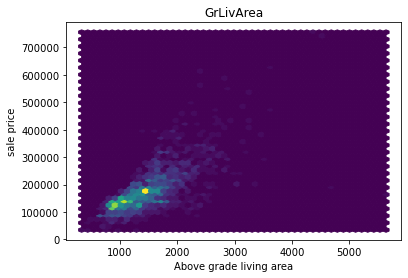

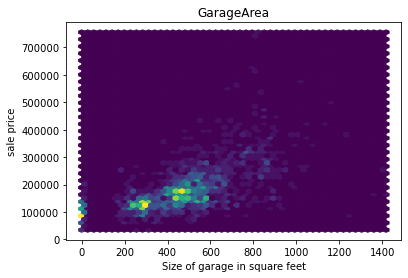

In [1463]:
plt.hexbin(train['GrLivArea'], train['SalePrice'], gridsize = 50)
plt.title('GrLivArea')
plt.xlabel('Above grade living area')
plt.ylabel('sale price')
plt.show()

plt.hexbin(train['GarageArea'], train['SalePrice'], gridsize = 50)
plt.title('GarageArea')
plt.xlabel('Size of garage in square feet')
plt.ylabel('sale price')
plt.show()

از ویژگی های دسته ای که به نظر می آیند در قیمت خانه تاثیرگذار باشند می توان کیفیت حفاظ، نوع پرداخت و امکانات خانه را نام برد که نمودار های مربوط به آن ها در زیر نشان داده شده اند. 

<AxesSubplot:title={'center':'Fence'}, xlabel='Fence Quality', ylabel='Number'>

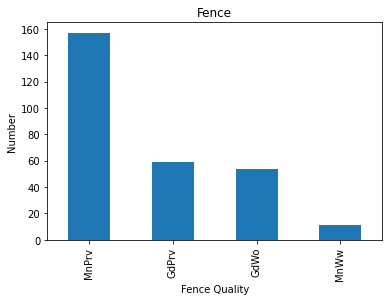

In [1464]:
train['Fence'].value_counts().plot(kind='bar', title = 'Fence', xlabel = 'Fence Quality', ylabel = 'Number')

<AxesSubplot:title={'center':'SaleType'}, xlabel='Type of Sale', ylabel='Number'>

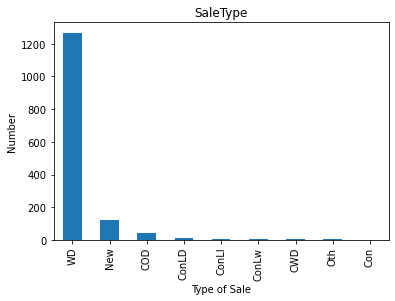

In [1465]:
train['SaleType'].value_counts().plot(kind='bar', title = 'SaleType', xlabel = 'Type of Sale', ylabel = 'Number')

<AxesSubplot:title={'center':'Utilities'}, xlabel='Type of utilities available', ylabel='Number'>

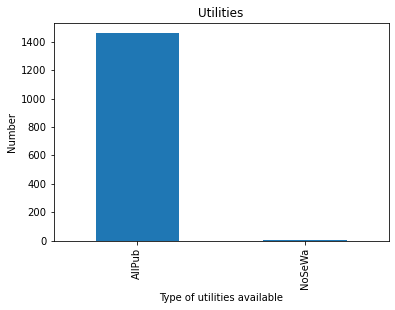

In [1466]:
train['Utilities'].value_counts().plot(kind='bar', title = 'Utilities', xlabel = 'Type of utilities available', ylabel = 'Number')

### فاز اول

برای مدیریت داده های گمشده از چندین روش می توان استفاده کرد. به طور مثال حذف ستونی که داده گمشده در آن قرار دارد، جایگزین کردین مقدار گمشده با میانگین یا میانه و یا حذف ردیف هایی که بعضی از ویژگی های آن مقداری ندارند.
اگر تعداد داده های گمشده ستون زیاد باشد، بهتر است که آن را حذف کنیم چون کمکی به ما نمی کند و بررسی آن ویژگی فقط روی چند فرد مشخص نمی تواند مارا به نتیجه گیری کلی برای بقیه نمونه هایی که داریم برساند.
حذف ردیف هایی که بعضی از ویژگی های آن ها خالی است ممکن است باعث شود داده های زیادی را از دست بدهیم در صورتی که ممکن بود بتوانیم داده های گمشده را به شکل دیگری که قابل استفاده تر باشد مدیریت کنیم.
جایگزین کردن داده های گمشده با آماره ها روش بهتری نسبت به دو روش قبل است. به طور مثال می توان از میانگین ستون برای این منظور استفاده کرد. به این ترتیب میانگین ستون پس از این عملیات تغییری نمی کند ولی انحراف معیار آن کم می شود. استفاده از میانگین این مشکل را دارد که هنگامی که چندین داده با مقدار کم و یک دادده با مقدار زیاد داشته باشیم، تاثیر آن مقدار زیاد خیلی بیشتر است و میانگین عدد مناسبی برای جایگزینی داده گمشده نخواهد بود. پس در شرایطی که انحراف معیار زیاد است بهتر است از میانه استفاده کنیم.


در اینجا دو نوع داده گمشده داریم. یک سری آن هایی هستند که در توضیحات ویژگی ها نوشته شده خالی بودن آن ها مساوی با نداشتن آن ویژگی است مانند PoolQc، GarageType و ... برای این ویژگی ها صرفا کافی است به جای داده های گمشده مقدار None را قرار دهیم تا واضح تر نیز باشد.
دسته دیگر آن هایی هستند که هیچ مقداری ندارند و واقعا گمشده اند مانند LotFrontAge، MasvnrType و MasvnrArea که داده های گمشده این ویژگی ها را با میانه آن ستون در ستون های عددی و با مد در ستون های غیرعددی پر می کنیم.


In [1467]:
newtrain = train.loc[:, (train.columns != 'LotFrontage')  & (train.columns != 'MasVnrType') &(train.columns != 'MasVnrArea')].fillna('None')
train['LotFrontage'].fillna(train['LotFrontage'].median(), inplace = True)
train['MasVnrType'].fillna('None', inplace = True)
train['MasVnrArea'].fillna(train['MasVnrArea'].median(), inplace = True)
newtrain = newtrain.join(train['LotFrontage'])
newtrain = newtrain.join(train['MasVnrType'])
newtrain = newtrain.join(train['MasVnrArea'])
train = newtrain


هدف از نرمالیزه کردن این است که ستون های عددی را به گونه ای تعییر دهیم که مقیاس همه شان یکی شود. پس همه ستون ها که دامنه های متفاوتی دارند، پس از این عملیات دامنه شان یکی می شود. هنگامی که دامنه ها متفاوت است ممکن است یک ویژگی به خاطر مقادیر زیادی که دارد تاثیر بیشتری روی مقدار نهایی بگذارد در صورتی که لزوما به این معنی نخواهد بود که باید آن را به عنوان پارامتر مهم تری در نظر بگیریم. در اینجا نیز بهتر است که داده ها را نرمالیزه کنیم.  

برای کار کردن با داده های غیر عددی دو راه داریم. یکی این که آن ستون ها را حذف کنیم و دیگری این که مقادیر غیر عددی را به گونه ای به مقادیر عددی تبذیل کنیم. اشکال روش اول این است که ویژگی ها و اطلاعات زیادی را از دست می دهیم که ممکن است در تحلیل نهایی برای ما مفید باشند. پس بهتر است با روش های متفاوتی که وجود دارند، ستون های غیر عددی را به ستون های عددی تبدیل کنیم.

سه نوع داده دسته ای وجود دارد که برای هر کدام روش متفاوتی را برای تبدیل شان به عدد در نظر می گیریم.
نوع اول داده هایی هستند که فقط دو مقدار True و False می گیرند که در این صورات می توان True را به 1 و False را به 0 map کرد.
نوع دوم داده هایی هستند که برای ارزیابی به کار می روند و به نوعی ترتیب در آن ها مهم است. به طور مثال می توان به ستون *ExterQual* اشاره کرد. در اینجا باید به مقداری که از لحاظ کیفیت بهتر است عدد بالاتری اختصاص داده شود. پس هر چه کیفیت بهتر باشد، عددی که نسبت می دهیم بیشتر است و برعکس.
نوع سوم داده ها آن هایی هستند که ترتیب خاصی ندارند و صرفا مقادیر متفاوت آن ویژگی را بیان می کنند. در اینجا بهتر است که از روش one hot استفاده کنیم. این روش به این صورت است که به ازای هر مقداری که آن ستون می تواند بگیرد ستون جدیدی می سازد و اگر آن ویژگی را داشت مقدار یک و در غیر این صورت صفر را به آن اختصاصا می دهد. این روش باعث می شود که در نهایت تعداد ستون های بیشتری داشته باشیم ولی باید توجه شود که اگر روش دوم را روی این داده ها به کار گیریم در دقت نهایی تاثیر منفی خواهد داشت. 

In [1468]:
# ExterQual = {'Ex':5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1}
# train['ExterQual'] = train['ExterQual'].map(ExterQual)

# ExterCond = {'Ex':5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1}
# train['ExterCond'] = train['ExterCond'].map(ExterCond)

# BsmtQual = {'Ex':5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}
# train['BsmtQual'] = train['BsmtQual'].map(BsmtQual)

# BsmtCond = {'Ex':5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}
# train['BsmtCond'] = train['BsmtCond'].map(BsmtCond)

# BsmtExposure = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'None':0}
# train['BsmtExposure'] = train['BsmtExposure'].map(BsmtExposure)
 
# BsmtFinType1 = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0}
# train['BsmtFinType1'] = train['BsmtFinType1'].map(BsmtFinType1)

# BsmtFinType2 = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0}
# train['BsmtFinType2'] = train['BsmtFinType2'].map(BsmtFinType2)

# HeatingQC = {'Ex':5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1}
# train['HeatingQC'] =train['HeatingQC'].map(HeatingQC)

# KitchenQual = {'Ex':5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1}
# train['KitchenQual'] = train['KitchenQual'].map(KitchenQual)

# FireplaceQu = {'Ex':5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}
# train['FireplaceQu'] = train['FireplaceQu'].map(FireplaceQu)

# GarageQual = {'Ex':5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}
# train['GarageQual'] = train['GarageQual'].map(GarageQual)

# GarageCond = {'Ex':5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}
# train['GarageCond'] = train['GarageCond'].map(GarageCond)

# PoolQC = {'Ex':4, 'Gd': 3, 'TA':2, 'Fa':1, 'None':0}
# train['PoolQC'] = train['PoolQC'].map(PoolQC)
      
# Fence = {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'None':0}
# train['Fence'] = train['Fence'].map(Fence)

train = pd.get_dummies(train)


قبل از اینکه جواب نهایی و دقت مدل را ببینیم نمی توانیم اقدام به حذف ستون ها بکنیم. ممکن است که در نگاه اول وابستگی ای بین ستون مورد نظر و قیمت خانه نباشد ولی ترکیب آن ستون با ستون های دیگر و در نظر گرفتن همه این ها باهم تاثیر چشمگیری روی مدل ما داده باشد. پس اگر ستونی قرار باشد حذف شود پس از این که درخت تصمیم ساخته شد، می توان آن را هرس کرده و ستون ها را حذف کرد. پس در این جا فقط ستون Id را حذف می کنیم که فقط یک عدد برای نشان دادن شماره داده است و ستون log که خودمان آن را محسابه کردیم.

In [1469]:
train = train.loc[:, (train.columns != 'Id') & ((train.columns != 'log'))]

برای اینکه بفهمیم مدلی که ساختیم چقدر خوب است باید بتوانیم آن را تست کنیم. به این منظور درصدی از داده هایی که برای آموزش داریم را کنار می گذاریم و از آن ها استفاده می کنیم تا خطای مدل را روی آن ها ببینیم. باید درصد بیشتری از داده آموزش را برای آموزش مدل استفاده کنیم و مقدار کمی از آن را برای تست اختصاص دهیم. این به این دلیل است که مدل ما بتواند داده های متفاوت را ببیند و overfit کمتر اتفاق می افتد. اگر تعداد داده ای که مدل بر اساس آن آموزش می بیند کم باشد روی همان تعداد محدود fit شده و باعث می شود که variance پایینی داشته باشد. در اینجا مقادیر مختلف را تست کردیم و وقتی که 0.95 داده ها را برای آموزش انتخاب کردیم، نتیجه بهتری داشت.

خوب است که قبل از شروع یادگیری داده ها به صورت تصادفی چیده شده باشند. ممکن است که در فایل آموزش داده هایی با یک سری ویژگی پشت سر هم باشند و سپس داده هایی که برای test انتخاب کرده ایم ویژگی های متفاوتی داشته باشند. در این صورت چون مدل ما روی داده های آموزشی fit شده است و این داده هاس test کاملا جدید هستند دقت خوبی نخواهد داشت.
باید دقت شود که اگر در هر بار اجرای الگوریتم داده ها را تصادفی انتخاب کنیم هربار نتیجه های متفاوتی می گیریم و نمی توانیم دقت را به درستی ارزیابی کنیم و یا هایپرپارامترها را tune کنیم. باید یک بار فایل آموزش را به ترتیبی تصادفی چید و سپس همیشه از آن فایل استفاده کرد و غیرتصادفی داده های train و test را انتخاب کرد.

از دیگر روش های تقسیم داده ها می توان به k fold cross validation و leave p-out validation اشاره کرد.
k fold cross validation به این صورت عمل می کند که داده ها را به k دسته تقسیم کرده و هربار یکی از آن ها را به عنوان validation در نظر می گیرد.
leave p-out validation ابگونه عمل می کند که p تا از داده ها را به عنوان validation انتخاب می کند و همه حالاتی که p داده از کل داده ها انتخاب شوند را محسابه می کند که هزینه زمانی بسیار بالایی دارد.

In [1470]:
size = len(train)
train_df = train.iloc[:int(0.95 * size), :]
test_df = train.iloc[int(0.95 * size):size, :]
train_actual = train_df['SalePrice']
train_df = train_df.loc[:, train_df.columns != 'SalePrice']
test_actual = test_df['SalePrice']
test_df = test_df.loc[:, test_df.columns != 'SalePrice']

In [1471]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_dfs = scaler.fit_transform(train_df)
test_dfs = scaler.fit_transform(test_df)


### فاز دوم

In [1472]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
tuned_parameters = {'n_neighbors' : [2, 5, 7, 10]}
param = [2, 5, 7, 10]
knn = GridSearchCV(KNeighborsRegressor(), tuned_parameters, scoring= 'neg_mean_absolute_error')
knn.fit(train_dfs, train_actual)
predictions = knn.predict(test_dfs)
rmse = mean_squared_error(test_actual, predictions, squared = False)
mae = mean_absolute_error(test_actual, predictions)
print("test:")
print("\tRMSE ", rmse)
print("\tMAE ", mae)
predictions = knn.predict(train_dfs)
rmse = mean_squared_error(train_actual, predictions, squared = False)
mae = mean_absolute_error(train_actual, predictions)
print("train:")
print("\tRMSE ", rmse)
print("\tMAE ", mae)


print(knn.best_params_)
for i in range(len(param)):
    print(param[i], " ", knn.cv_results_['std_test_score'][i])
   

test:
	RMSE  30873.37770347629
	MAE  22945.37671232877
train:
	RMSE  41519.45541703069
	MAE  26557.844628695024
{'n_neighbors': 10}
2   2401.6602893886475
5   2192.2149536390903
7   2400.867606141264
10   2238.3055845775134


In [1473]:
from sklearn.tree import DecisionTreeRegressor  
tuned_parameters = {'max_depth' : [10, 29, 20, 22, 25]}
param = [10, 29, 20, 22, 25]
regressor = GridSearchCV(DecisionTreeRegressor(random_state = 0), tuned_parameters, scoring= 'neg_mean_absolute_error')
regressor.fit(train_df, train_actual)
predictions = regressor.predict(test_df)
rmse = mean_squared_error(test_actual, predictions, squared = False)
mae = mean_absolute_error(test_actual, predictions)
print("test:")
print("\tRMSE ", rmse)
print("\tMAE ", mae)
predictions = regressor.predict(train_df)
rmse = mean_squared_error(train_actual, predictions, squared = False)
mae = mean_absolute_error(train_actual, predictions)
print("train:")
print("\tRMSE ", rmse)
print("\tMAE ", mae)
print(regressor.best_params_)
for i in range(len(param)):
    print(param[i], " ", regressor.cv_results_['std_test_score'][i])
    


test:
	RMSE  24200.514598494883
	MAE  17445.62785908154
train:
	RMSE  9708.987779335317
	MAE  6251.825504411074
{'max_depth': 10}
10   1453.1728402981976
29   1833.1638724063864
20   1802.3613323451334
22   969.8736987844079
25   1504.785083662117


In [1474]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit((train_df), train_actual)
predictions = reg.predict((test_df))
rmse = mean_squared_error(test_actual, predictions, squared = False)
mae = mean_absolute_error(test_actual, predictions)
print("test:")
print("\tRMSE ", rmse)
print("\tMAE ", mae)
predictions = reg.predict(train_df)
rmse = mean_squared_error((train_actual), predictions, squared = False)
mae = mean_absolute_error((train_actual), predictions)
print("train:")
print("\tRMSE ", rmse)
print("\tMAE ", mae)

test:
	RMSE  109024.4098395576
	MAE  25616.784514854524
train:
	RMSE  19554.66120782015
	MAE  12481.04777590218


overfitting هنگامی رخ می دهد که bias پایین باشد و variance زیاد باشد. درواقع مدل ما روی داده های train دقت خوبی دارد ولی هنگام مواجهه با داده های جدید دقت لازم را ندارد. underfitting برعکس این موضوع است و هنگامی رخ می دهد که مدل روی داده های تست به خوبی عمل کند ولی دقت خوبی روی داده های آموزش نداشته باشد.
در اینجا مشاهده می شود که overfitting در الگوریتم linear regression اتفاق افتاده است و روی داده های تست به خوبی عمل نمی کند. این ممکن است به این دلیل باشد که داده ها را به صورت خطی نمی توان از یکدیگر جدا کرد و مرز های خطی بینشان نیست. هم چنین چون در اینجا داده هایی داریم که به یکدیگر ئابسته اند این  مدل انتخاب خوبی نیست و از بین ستون هایی که وابستگی زیادی به یکدیگر دارند یکی از آن ها باید حذف بشوند.

در اینجا به بررسی پیش پردازش هایی که انجام داده ایم می پردازیم. نرمالیزه کردن داده ها، اثر مثبتی داشته و باعث شده که مدل ما بهتر عمل کند. علت این موضوع این است که همه داده ها در یک دامنه قرار گرفته و مقدار زیاد داده ها تاثیر نامناسب در یادگیری مدل نمی گذارند. 
پر کردن داده های گم شده با میانه و مد بهترین حالت مدیریت این داده ها بود. پر کردن این داده ها با میانگین باعث می شد که مقادیر زیادی که برخی از داده ها دارند، روی مقدار نهایی میانگین تاثیرگذار باشد و مقداری که جایگزین می کنیم مقدار معقولی برای ما نباشد. هم چنین حذف ستون ها با داده های گم شده دقت مارا پایین تر می آورد.
پیش پردازش دیگری که انجام شد و تاثیر آن باید مشاهده شود، نحوه مدیریت ستون های غیرعددی است. حذف این ستون ها مدل مارا به شدت ضعیف می کند. هم چنین استفاده از روش one hot تاثیر بهتری دارد نسبت به حالتی که برای آن هایی که کیفیت را ارزیابی می کنند هر مقدار را به یک عدد نگاشت کنیم.

### فاز سوم

In [1475]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0, n_estimators = 50, max_depth = 10)
regr.fit(train_df, train_actual)
predictions = regr.predict(test_df)
rmse = mean_squared_error(test_actual, predictions, squared = False)
mae = mean_absolute_error(test_actual, predictions)
print("test:")
print("\tRMSE ", rmse)
print("\tMAE ", mae)
predictions = regr.predict(train_df)
rmse = mean_squared_error(train_actual, predictions, squared = False)
mae = mean_absolute_error(train_actual, predictions)
print("train:")
print("\tRMSE ", rmse)
print("\tMAE ", mae)

test:
	RMSE  20843.487153107177
	MAE  14311.324153687448
train:
	RMSE  12241.909916715947
	MAE  8387.207886831937


دو هایپرپارامتری که در این الگوریتم در نظر می گیریم، تعداد درخت هایی است که ساخته می شوند و دیگری عمق هر درخت. هرچه تعداد درخت ها بیشتر باشند، وابستگی کمتری به یکدیگر خواهند داشت و در نتیجه جواب بهتری از مدل می گیریم. باید دقت شود که زیاد کردن بیش از اندازه تعداد درخت ها هزینه محاسباتی و زمانی خواهد داشت و از جایی به بعد این افزایش تاثیر چندانی روی variance ندارد.
عمق درخت ها نیز باید به صورتی انتخاب شوند که overfitting رخ ندهد. پس عمق بیشتر هم هزینه بیشتری دارد و هم دقت مدل را پایین می آورد.

In [1476]:
from sklearn.ensemble import VotingRegressor
er = VotingRegressor([('lr', knn), ('rf', regressor), ['gb', reg]])
er.fit(train_df, train_actual)
predictions = er.predict(test_df)
rmse = mean_squared_error(test_actual, predictions, squared = False)
mae = mean_absolute_error(test_actual, predictions)
print("test:")
print("\tRMSE ", rmse)
print("\tMAE ", mae)
predictions = er.predict(train_df)
rmse = mean_squared_error(train_actual, predictions, squared = False)
mae = mean_absolute_error(train_actual, predictions)
print("train:")
print("\tRMSE ", rmse)
print("\tMAE ", mae)


test:
	RMSE  37500.07324753027
	MAE  18630.896796293244
train:
	RMSE  17951.060523568096
	MAE  11483.34635907123


کارکرد این الگوریتم به این بستگی دارد که دقت هر مدل به تنهایی چقدر است. ممکن است یک مدل دقت بالایی داشته باشد ولی با مدل های دیگری رای گیری شود که دقت مناسبی ندارند. در اینجا چون تعداد مدا هایی که دقت پایین تری دارند بیشتر است، دقت نهایی نیز کاهش می یابد و به خوبی دقت مدل فردی که داشتیم نیست. ولی در جاهایی که مدل ها دقت نسبتا یکسانی دارند استفاده از voting regression دقت بهتری نسبت به هرکدام از آن ها خواهد داشت. اگر مدلی داشته باشیم که دقت پایینی دارد، voting regression جواب بهتری نسبت به آن می دهد.
پس در اینجا که knn و decision tree از دقت خوبی برخوردار بودند ولی linear regression دقت پایین تری داشت باعث شد که voting regression نسبت به دوتای اول بدتر عمل کند ولی نسبت به linear regression بهتر باشد. در اینجا می توانستیم وزن تاثیر linear regression را کمتر کنیم تا جواب نهایی بهتر شود 

## نتیجه گیری
### در یادگیری ماشین قبل از اینکه شروع به ساختن مدل کنیم ابتدا باید داده ها را به خوبی بشناسیم و بتوانیم آن ها را تحلیل کنیم. پیش پردازش هایی که روی داده انجام می دهیم تاثیر چشم گیری روی نتیجه نهایی دارد پس باید روش های مناسب را بیابیم. استفاده از درخت تصمیم الگوریتم بهتری نسبت به knn  و linear regression است . بهترین عملکرد را الگوریتم random forest دارد زیرا ایراداتی که در یک درخت تصمیم به تنهایی وجود دارد در اینجا رفع می شوند و مدل دقت بیشتری خواهد داشت.

## منابع

1. *https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15*
2. *https://dev.to/rokaandy/logarithmic-transformation-in-linear-regression-models-why-when-3a7c*
3. *https://blog.majestic.com/case-studies/correlation-data-transformations/*
4. *Towardsdatascience.com/Categorical_Encoding_Techniques*
5. *https://scikit-learn.org/stable/modules/generated/*